In [52]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [49]:
train_dataset = datasets.MNIST(
    root= 'dataset/train_set',
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,),(0.5,))
    ]),
    download = True
    )
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle = True,
)
validation_set = datasets.MNIST(
    root= 'dataset/test_set',
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,),(0.5,))
    ]),
    download = True
    )
valid_loader = torch.utils.data.DataLoader(
    validation_set,
    batch_size=32,
    shuffle = True,
)

100%|██████████| 9912422/9912422 [00:00<00:00, 253682133.91it/s]

Extracting dataset/train_set/MNIST/raw/train-images-idx3-ubyte.gz to dataset/train_set/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 118296576.00it/s]


Extracting dataset/train_set/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/train_set/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 104716422.33it/s]

Extracting dataset/train_set/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/train_set/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7872119.33it/s]


Extracting dataset/train_set/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/train_set/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 261451218.06it/s]


Extracting dataset/test_set/MNIST/raw/train-images-idx3-ubyte.gz to dataset/test_set/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 48963497.91it/s]


Extracting dataset/test_set/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/test_set/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 98081055.66it/s]

Extracting dataset/test_set/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/test_set/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 21599238.97it/s]


Extracting dataset/test_set/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/test_set/MNIST/raw



In [51]:
dataiter = iter(train_loader)
images,labels = next(dataiter)
images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

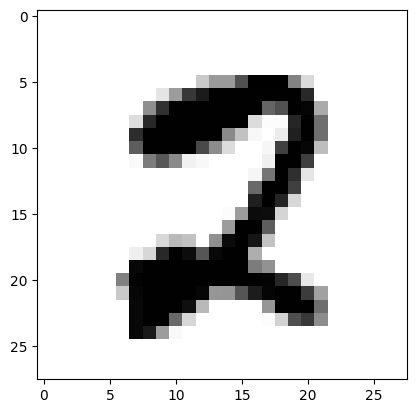

In [54]:
plt.imshow(images[0].numpy().squeeze(),cmap='gray_r')

In [56]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [58]:
epochs= 10
batch_size = 32
lr = 0.001
optimizer = optim.SGD(model.parameters(),lr,momentum=0.09)
loss_fn = nn.NLLLoss() # negative log-likeihood loss


In [61]:
loss_log = []
acc_log = []

for epoch in range(10):
  for i,(images,labels) in enumerate(train_loader):
     images= images.view(images.shape[0], -1)
     output = model(images)
     loss = loss_fn(output,labels)
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()

     if i % 100 ==0:
        print(loss.item())


2.3615574836730957
2.286433696746826
2.2572836875915527
2.2326695919036865
2.2098824977874756
2.245940685272217
2.163888692855835
2.166975736618042
2.058499813079834
2.1297595500946045
2.0621511936187744
2.0891332626342773
1.9700419902801514
2.035421133041382
1.8768450021743774
1.8086036443710327
1.7898861169815063
1.6917438507080078
1.6616322994232178
1.727049708366394
1.732284665107727
1.5840409994125366
1.3847278356552124
1.407454013824463
1.3388137817382812
1.315281867980957
1.3950457572937012
1.3158386945724487
1.1964689493179321
1.1387786865234375
0.958419144153595
0.8685439229011536
1.0893999338150024
1.1083135604858398
0.9737551808357239
0.854360818862915
1.109726071357727
0.6871156692504883
0.6277971863746643
0.8794075846672058
0.6671947836875916
0.7266063690185547
0.5981377959251404
0.6016160249710083
0.8151454925537109
0.6697225570678711
0.6144267916679382
0.6130010485649109
0.5973039865493774
0.9586896300315857
0.43918338418006897
0.8600484132766724
0.5070371627807617
0.589

In [67]:
# Test the model
images,labels = next(iter(valid_loader))
img = images[0].view(1,784)

with torch.no_grad():
   out = model(img)
ps = torch.exp(out)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))


Predicted Digit = 0


In [68]:
correct_count, all_count = 0, 0
for images,labels in valid_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)


    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 60000

Model Accuracy = 0.90675
